In [ ]:
# importações
# sklearn version: 1.2.2
import pandas as pd # importação do pandas
from sklearn.tree import DecisionTreeClassifier # Importação do classificador Decision Tree
from sklearn.model_selection import train_test_split # Importação das funções de treino e teste
from sklearn import metrics #Importação de módulo para aplicação de métricas de acurácia do scikit-learn
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

In [ ]:
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

In [ ]:
srag = pd.read_csv('//content/drive/MyDrive/Cópia de srag_dataset_2013_a_2023-attr_set_2.csv')
srag.head()

,PERD_OLFT,PERD_PALA,FEBRE,DISPINEIA,SATURACAO,FADIGA,SUPORT_VEN,RAIOX_RES,TOSSE,TOMO_RES,UTI,GARGANTA,CS_SEXO,DIST_PRI_INTERN,TEMPO_UTI,POSSUI_MORBIDADE,FAIXA_ETARIA,FAIXA_ETARIA_2,IMAGEM_RES,VACINAS,ANO,EVOLUCAO,CRITERIO,CLASSI_FIN,id
0,9.0,9.0,1.0,9.0,9.0,9.0,2.0,4.0,1.0,9.0,1.0,9.0,2.0,1.0,9.0,0.0,6.0,2.0,0.0,0.0,2013.0,9.0,1.0,0.0,0
1,9.0,9.0,1.0,9.0,9.0,9.0,2.0,2.0,1.0,9.0,1.0,9.0,1.0,1.0,9.0,0.0,8.0,2.0,0.0,0.0,2013.0,2.0,1.0,0.0,1
2,9.0,9.0,1.0,9.0,9.0,9.0,2.0,4.0,1.0,9.0,1.0,1.0,1.0,1.0,9.0,0.0,9.0,2.0,0.0,0.0,2013.0,9.0,1.0,0.0,2
3,9.0,9.0,1.0,9.0,9.0,9.0,1.0,5.0,1.0,9.0,2.0,9.0,1.0,1.0,9.0,2.0,10.0,3.0,0.0,0.0,2013.0,1.0,1.0,0.0,3
4,9.0,9.0,1.0,9.0,9.0,9.0,2.0,5.0,1.0,9.0,1.0,1.0,2.0,2.0,9.0,0.0,6.0,2.0,0.0,0.0,2013.0,2.0,1.0,0.0,4


In [ ]:
srag = srag.dropna()

In [ ]:
srag.columns

Index(['PERD_OLFT', 'PERD_PALA', 'FEBRE', 'DISPINEIA', 'SATURACAO', 'FADIGA',
       'SUPORT_VEN', 'RAIOX_RES', 'TOSSE', 'TOMO_RES', 'UTI', 'GARGANTA',
       'CS_SEXO', 'DIST_PRI_INTERN', 'TEMPO_UTI', 'POSSUI_MORBIDADE',
       'FAIXA_ETARIA', 'FAIXA_ETARIA_2', 'IMAGEM_RES', 'VACINAS', 'ANO',
       'EVOLUCAO', 'CRITERIO', 'CLASSI_FIN', 'id'],
      dtype='object')

In [ ]:
srag = srag.rename(columns={'CLASSI_FIN': 'label'})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dividir o dataset entre atributos que vão ser isados para construção do modelo (features) ou variável dependente a ser predita (label).

In [ ]:
feature_cols = ['PERD_OLFT', 'PERD_PALA', 'FEBRE', 'DISPINEIA', 'SATURACAO',
             'SUPORT_VEN', 'RAIOX_RES', 'TOMO_RES', 'UTI', 'GARGANTA',
             'CS_SEXO', 'DIST_PRI_INTERN', 'TEMPO_UTI', 'FAIXA_ETARIA_2', 'EVOLUCAO', 'ANO', 'IMAGEM_RES']

In [ ]:
X = srag[feature_cols]
y = srag.label

Dividindo o dado entre conjuntos de treino e teste
Neste caso, treinaremos o modelo com uma amostra de 80% do dataset e o testaremos com os 20% que não foram utilizados no teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Treinando e construindo o modelo

In [ ]:
# Criando objeto do Classificador
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=15)

# Treinando classificador
clf = clf.fit(X_train,y_train)

# Predizendo as classes presentes no teste
y_pred = clf.predict(X_test)

# calculando pontuação para cada predição no teste
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

Obtendo métricas de validação do modelo.
Com que frequencia o modelo classifica da forma correta?

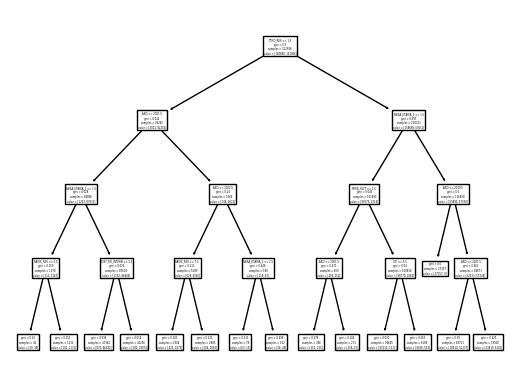

In [ ]:
tree.plot_tree(clf, feature_names=feature_cols)
plt.savefig('srag_tree.pdf')

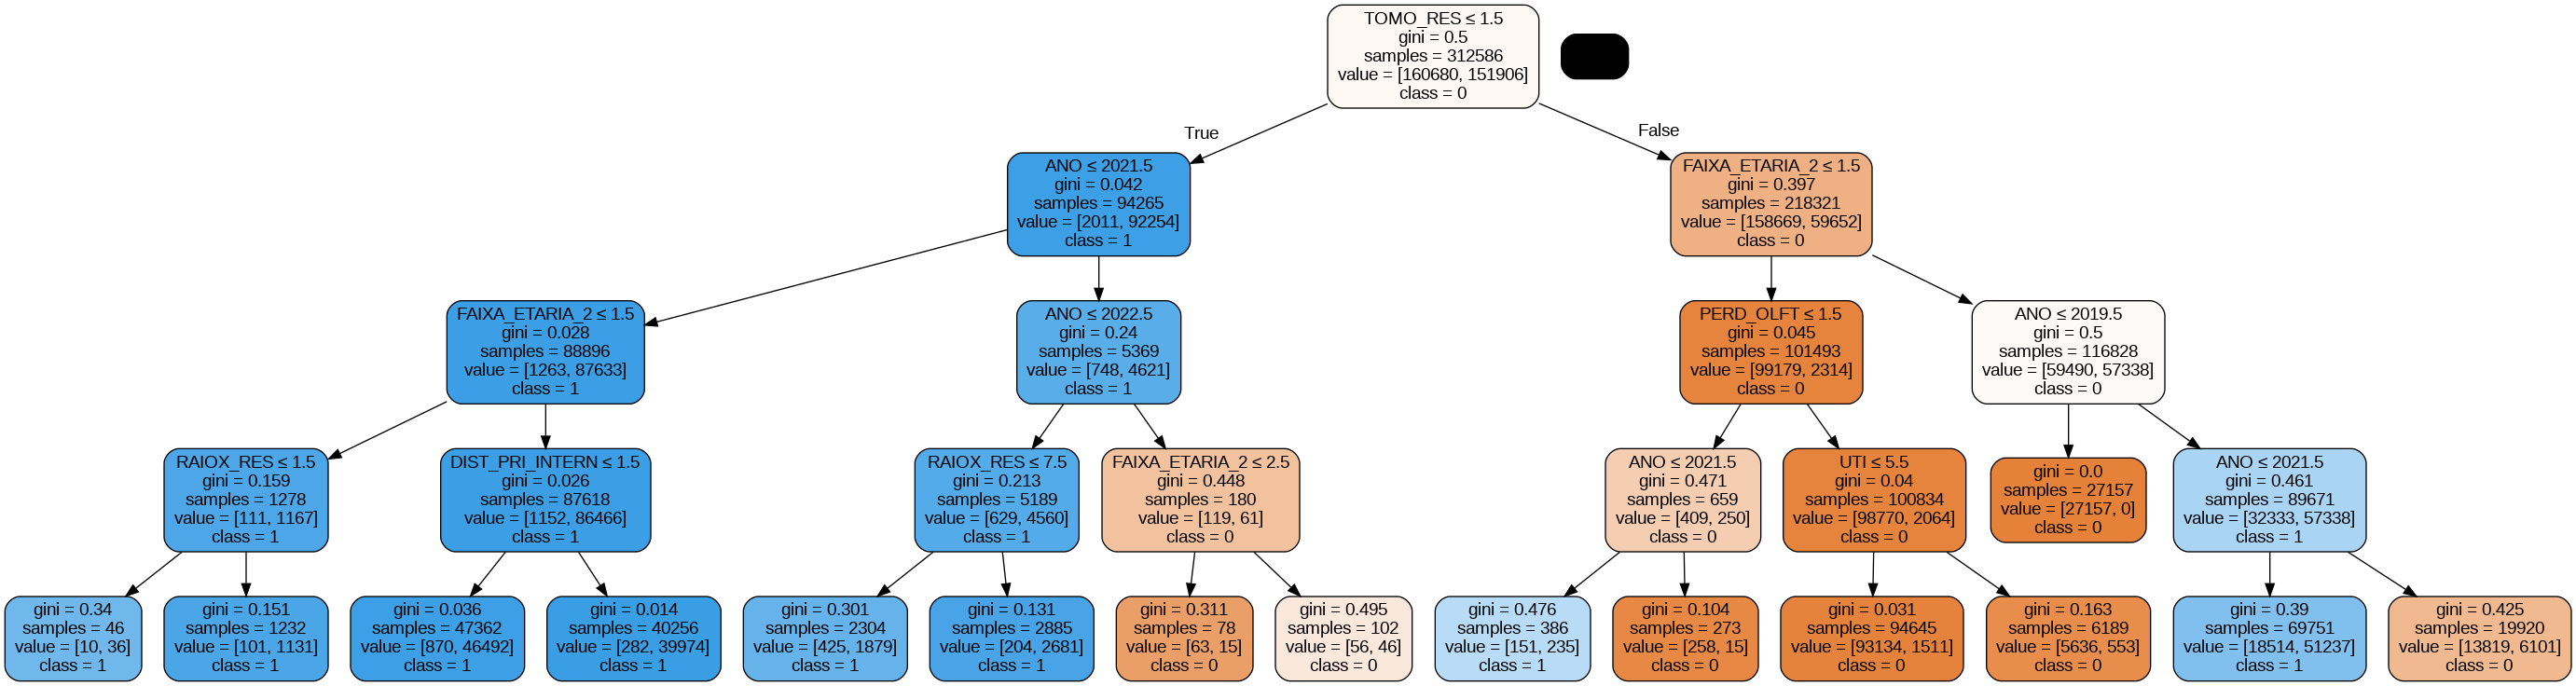

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('srag.png')
Image(graph.create_png())

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9102844638949672


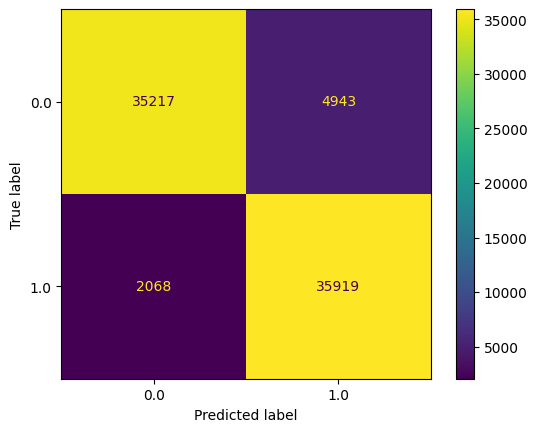

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

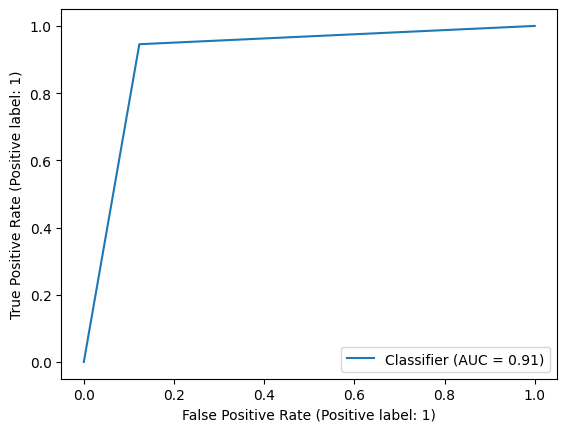

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

<Axes: >

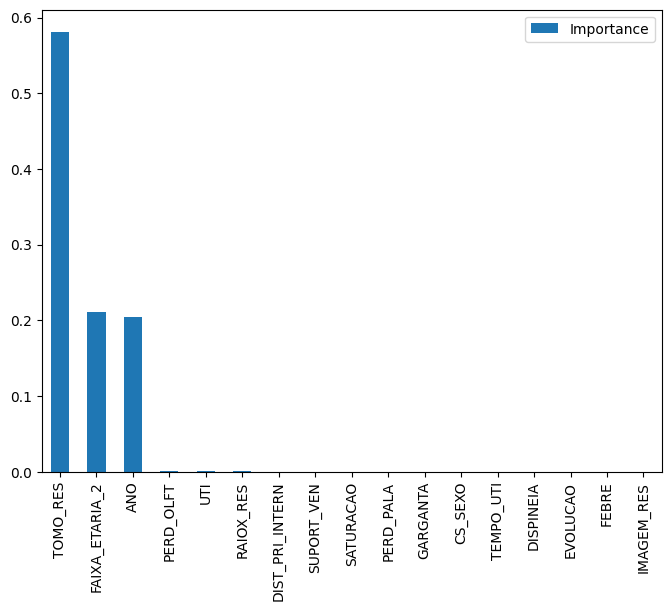

In [ ]:
feat_importances = pd.DataFrame(clf.feature_importances_, index=feature_cols, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))